## Crypto Arbitrage

This analysis is for a high-tech investment firm. The vice president (VP) of my department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, are there opportunities to capitalize on simultaneous price dislocations in those markets?

We will sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. The task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

The analysis will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Importing the required libraries and dependencies.

In [253]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collecting the Data

Steps to follow:

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Import the data from `bitstamp.csv` file to DataFrame called `bitstamp`.

In [254]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path("Resources/bitstamp.csv"), index_col="Timestamp", parse_dates=True, infer_datetime_format=True)


In [255]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


In [256]:
bitstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 2: Repeat Steps 1 for `coinbase.csv` file.

In [298]:
# Read in the CSV file called "coinbase.csv" using the Path module with proper use of datetime index
coinbase = pd.read_csv(Path("Resources/coinbase.csv"), index_col="Timestamp", parse_dates=True, infer_datetime_format=True)
coinbase

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


## Phase 2: Preparing the Data

To prepare and clean the data for analysis, the following steps were completed for the data coming from both exchanges:

1. Drop all missing values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

In [258]:
# Number of missing values in bitstamp
bitstamp.isnull().sum()

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [259]:
# Proportion of missing values in bitstamp looks very minimal
bitstamp.isnull().mean()


Open              0.003651
High              0.003651
Low               0.003651
Close             0.000000
BTC Volume        0.003651
USD Volume        0.003651
Weighted Price    0.003651
dtype: float64

##### Considering the small proportion of missing values (less than 0.5%), we can determine that the 400+ missing values in each of the columns of bitstamp data is minimal, and that the quality of the analysis will likely not be affected by dismiss them.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [260]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp=bitstamp.dropna()


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [261]:
# Use the str.replace function to remove the dollar sign, $
bitstamp["Close"]=bitstamp["Close"].str.replace("$","")

/Users/Paola/Applications/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [262]:
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129067 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129067 non-null  object 
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


##### We can see that we have removed all missing values (all variable counts show as non-null). However, column "Close" appears still as 'object', which we will need to transform to float.

### Step 3: Convert the data type of the Close column to a `float`.

In [263]:
# Convert the Close data type to a float type
bitstamp["Close"]=bitstamp["Close"].astype(float)
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129067 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129067 non-null  float64
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [264]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()
#Data has no duplicated. Nothing to drop.

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [299]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129540 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129322 non-null  float64
 1   High            129322 non-null  float64
 2   Low             129322 non-null  float64
 3   Close           129540 non-null  object 
 4   BTC Volume      129322 non-null  float64
 5   USD Volume      129322 non-null  float64
 6   Weighted Price  129322 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


In [300]:
coinbase.isnull().mean()

Open              0.001683
High              0.001683
Low               0.001683
Close             0.000000
BTC Volume        0.001683
USD Volume        0.001683
Weighted Price    0.001683
dtype: float64

In [301]:
# Dropping missing values (NaN)
coinbase=coinbase.dropna()
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


##### Coinbase data have been cleaned from missing values.

In [302]:
# Use the str.replace function to remove the dollar sign, $ in data from Coinbase exchange
coinbase.loc[:,"Close"]=coinbase.loc[:,"Close"].str.replace("$","")

/Users/Paola/Applications/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  
/Users/Paola/Applications/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [303]:
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum()
#Data has no duplicated. Nothing to drop.


0

In [304]:
#Thanksforming to float
coinbase.loc[:,"Close"]=coinbase.loc[:,"Close"].astype(float).dropna()
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,6934.00,1.012720,7022.275088,6934.070316


#####  End of Phase 2. The data has been prepared for analysis by dropping missing values, extracting "$", and assuring there are no duplicates.

## Phase 3: Analyze the Data

The analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus the analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose to focus analysis on the close price

Selecting the data to analyze. I used `loc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)
* Close


In [305]:
# Use loc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:,"Close"]

# Review the first five rows of the Series
bitstamp_sliced

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
                         ...   
2018-03-31 23:55:00     6922.56
2018-03-31 23:56:00     6920.32
2018-03-31 23:57:00     6934.72
2018-03-31 23:58:00     6927.65
2018-03-31 23:59:00     6928.01
Name: Close, Length: 129067, dtype: float64

In [307]:
# Use loc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:,"Close"]

# Review the first five rows of the Series
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Summary statistics and plots

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [227]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [228]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

In [229]:
# 1. Comparison of summary statistics from both exchanges
bit_coin_comparison=pd.concat([bitstamp_sliced.describe(), coinbase_sliced.describe()], join="inner", axis=1, keys=["Bitstamp_Close","Coinbase_close"])
bit_coin_comparison

,Bitstamp_Close,Coinbase_close
count,129067.000000,129322.000000
mean,10459.842453,10449.140958
std,2315.976088,2317.197419
min,5944.000000,5882.310000
25%,8613.370000,8609.230000
50%,10145.950000,10137.440000
75%,11444.810000,11397.237500
max,17234.980000,17177.990000


##### We can see in the table with basic statistics above that Bitstamp and Coinbase exchanges have similar closing price averages (10,460 USD versus 10,450 USD). That shows that there wasn't a bias toward a higher price in one exchange versus the other, in Q1-2018. Similarly, both exchanges shared a similar standard deviation (2,316 USD versus 2,317 USD), which means both exchanges have a similar level of fluctuation as well, during Q1-2018. The fact that as a whole they have similar statistics doesn't mean that is true for all subperiods. Let's go deeper into the analysis.

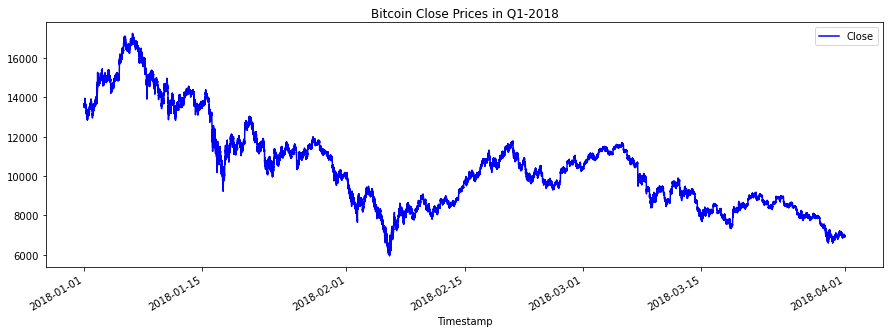

In [230]:
# 2a. Line plot for the bitstamp DataFrame for the full Q1-2018 period.
bitstamp_sliced.plot(legend=True, figsize=(15,5), title=("Bitcoin Close Prices in Q1-2018"), color="blue");

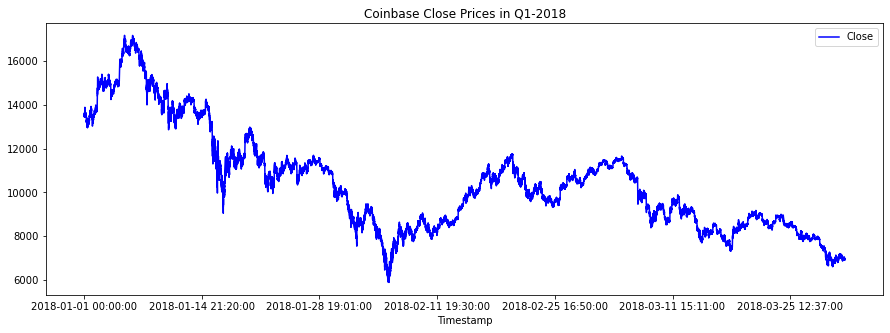

In [231]:
# 2b. Line plot for the coinbase DataFrame for the full length of time in the dataset 
coinbase_sliced.plot(legend=True, figsize=(15,5), title=("Coinbase Close Prices in Q1-2018"), color="blue");

##### Trends look pretty similar, so we overlaped the graphs to highlight differences.The overlayed plot below shows some blue areas where we can see there are some differences in price between the two exchanges.

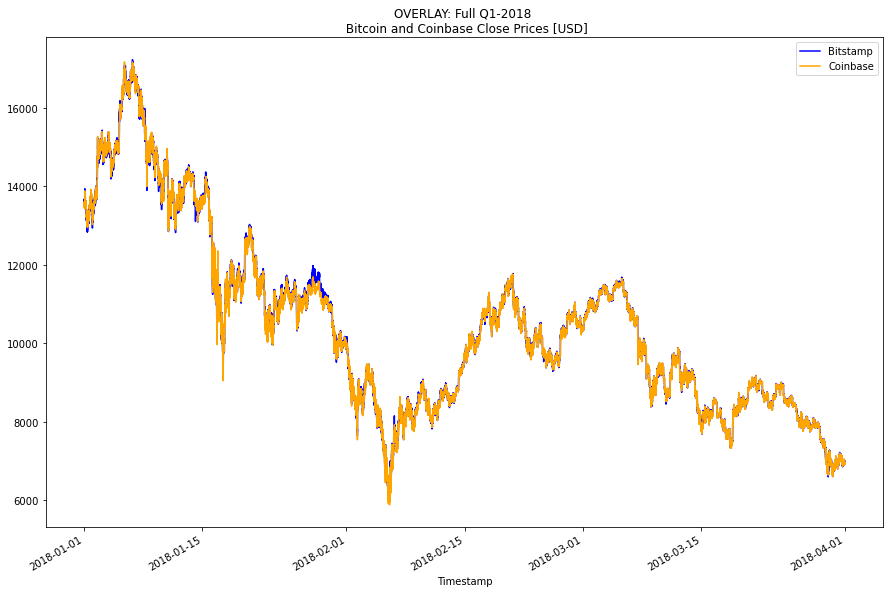

In [322]:
# 2c. Q1-2018 Overlay of Visualizations for the Bitstamp and Coinbase DataFrames in One Plot
bitstamp_sliced.plot(legend=True, figsize=(15,10), title=("OVERLAY: Full Q1-2018 \n Bitcoin and Coinbase Close Prices [USD]"), color="blue", label="Bitstamp");
coinbase_sliced.plot(legend=True, figsize=(15,10), color="orange", label="Coinbase");

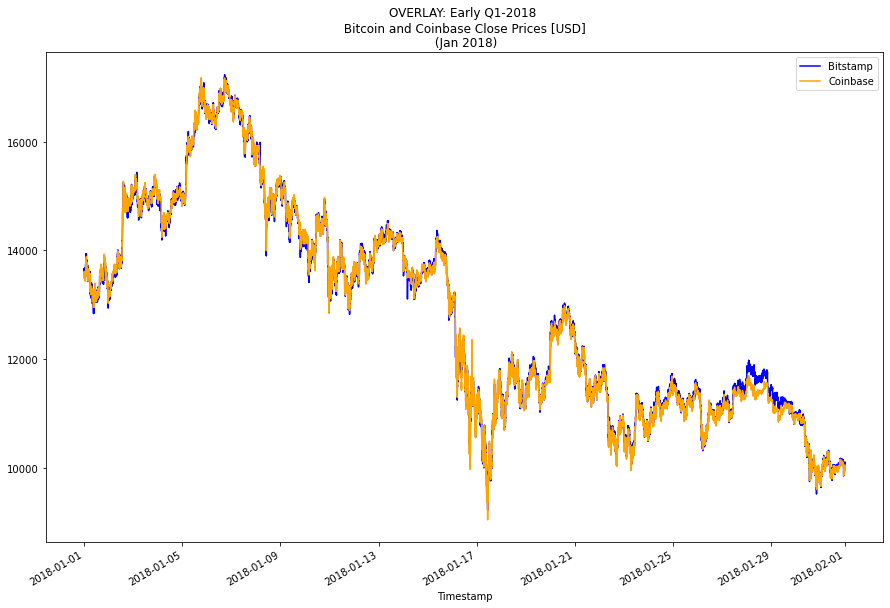

In [323]:
# EARLY COMPARISON - JANUARY 2018
# Overlay plot that visualizes the price action of both exchanges 
# for a one month period early in the dataset
bitstamp_sliced.loc['2018-01-01':'2018-1-31'].plot(legend=True, figsize=(15,10), title=("OVERLAY: Early Q1-2018 \n Bitcoin and Coinbase Close Prices [USD] \n (Jan 2018)"), color="blue", label="Bitstamp");
coinbase_sliced.loc['2018-01-01':'2018-1-31'].plot(legend=True, figsize=(15,10), color="orange", label="Coinbase");

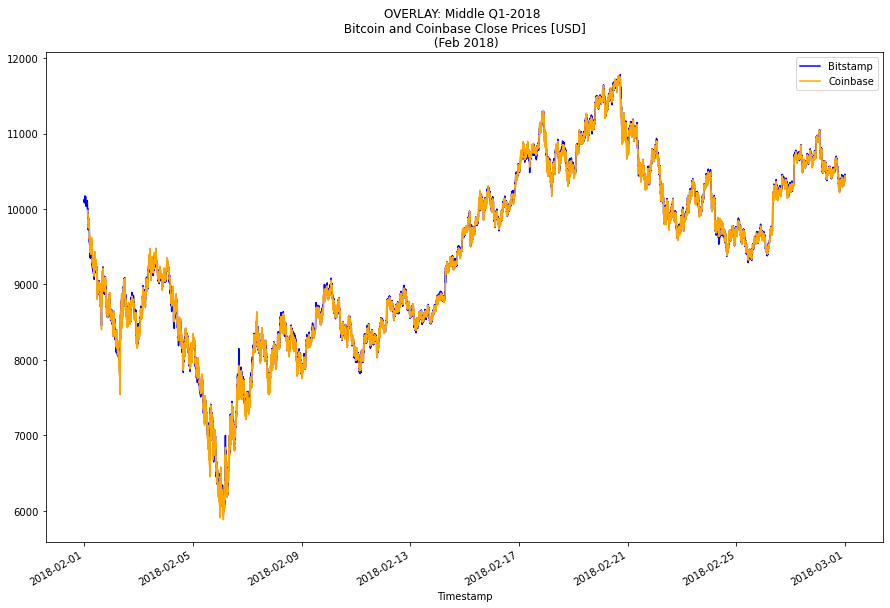

In [324]:
#MIDDLE OF QUARTER - FEBRUARY 2018
# Overlay plot that visualizes the price action of both exchanges
# for a one month period middle in the dataset
bitstamp_sliced.loc['2018-02-01':'2018-02-28'].plot(legend=True, figsize=(15,10), title=("OVERLAY: Middle Q1-2018 \n Bitcoin and Coinbase Close Prices [USD] \n (Feb 2018)"), color="blue", label="Bitstamp");
coinbase_sliced.loc['2018-02-01':'2018-02-28'].plot(legend=True, figsize=(15,10), color="orange", label="Coinbase");

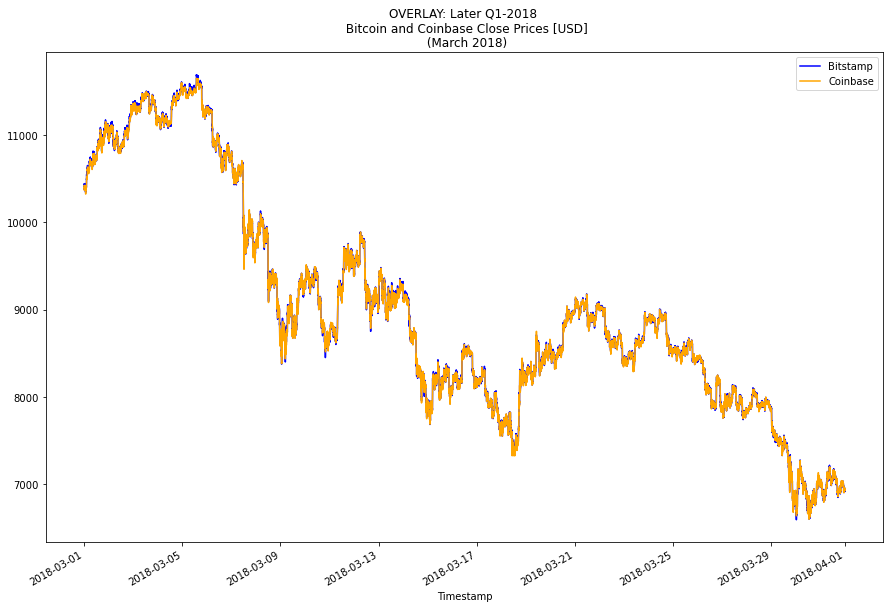

In [325]:
# LATER COMPARISON - MARCH 2018
# Overlay plot that visualizes the price action of both exchange
# for a one month period later in the dataset
bitstamp_sliced.loc['2018-03-01':'2018-3-31'].plot(legend=True, figsize=(15,10), title=("OVERLAY: Later Q1-2018 \n Bitcoin and Coinbase Close Prices [USD]\n (March 2018)"), color="blue", label="Bitstamp");
coinbase_sliced.loc['2018-03-01':'2018-3-31'].plot(legend=True, figsize=(15,10), color="orange", label="Coinbase");

count    128852.000000
mean          9.340684
std          42.434403
min        -606.800000
25%          -6.820000
50%           5.780000
75%          19.990000
max         439.050000
Name: Close, dtype: float64

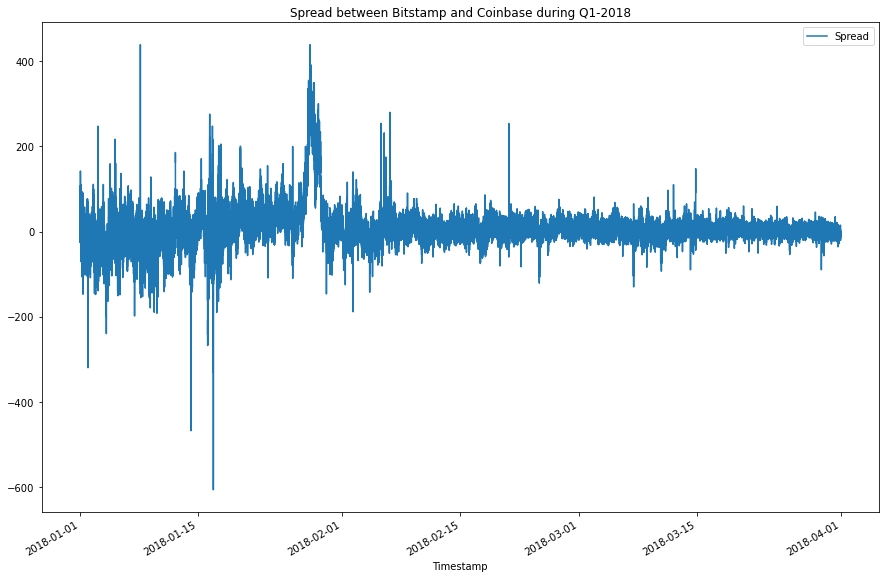

In [313]:
# Spread on Q1-2018 full period

spread_Q1_2018=bitstamp_sliced-coinbase_sliced
spread_Q1_2018.plot(legend=True, label= "Spread", title="Spread between Bitstamp and Coinbase during Q1-2018", figsize=(15,10), )

spread_Q1_2018.describe()

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes. The visualizations show that at the beggining of the first quarter in 2018 the differences in trading prices between both exchanges were higher than at the end of that quarter. Significant differences are not present necesarily every day. However, we can see:
> 1. at the overlaying plots, moments when you are able to distinguish the blue under the orange color. This is indication of a significant difference in the trading prices. This is more clear in January than February or March 2018, meaning, beggining versus end of quarter.
> 2. in the plot "Spread between Bitstamp and Coinbase in Q1-2018", we see spikes of significant differences. The larger spikes appear at the beggining of the quarter, and the number of spikes are much higher at the beggining as well.
> 3. in the Spread figure just reffered in point 2, we can see that most of the time there are fluctuations of positive and negative values for the spread, meaning that not always one exchange is trading higher than the other one. However, these fluctuations are among larger values at the beggining of the quarter than at the middle and end of the quarter. This indicates a higher variance of the spread at the beggining of the quarter.
> 4. There is one exception to this constant fluctuation indicated in point 3, that occurs at the end of January 2018. Then, we can see a cluster of positive spread for a short period. Periods like this have a higher opportunity for arbitrage. This appear to be on Jan 28th, and we will analize it more in detail in the next part of the analysis.

#### In conclusion, the visual analysis shows a change in the degree of spread from higher to lower as the quarter advanced, so an analysis for shorter periods is apropiate.

In [112]:
# Early Q1-2018 bitstamp
# Jan 2018
bitstamp_sliced.loc['2018-01-01':'2018-01-31'].describe()

count    44536.000000
mean     12872.410347
std       1926.531347
min       9222.000000
25%      11223.337500
50%      12678.020000
75%      14354.482500
max      17234.980000
Name: Close, dtype: float64

In [114]:
# Early Q1-2018 coinbase 
# Jan 2018
coinbase_sliced.loc['2018-01-01':'2018-01-31'].describe()

count    44619.000000
mean     12853.529106
std       1947.377305
min       9045.610000
25%      11172.855000
50%      12626.150000
75%      14345.010000
max      17177.990000
Name: Close, dtype: float64

In [314]:
# Comparison of Bitstamp and Coinbase exchanges at early stage, on Jan 2018.
bitstamp_coinbase_early=pd.concat([bitstamp_sliced.loc['2018-01-01':'2018-01-31'].describe(),coinbase_sliced.loc['2018-01-01':'2018-01-31'].describe()], axis=1, keys=["Bitstamp_Close_Early_stage", "Coinbase_close_Early_Stage"])
bitstamp_coinbase_early



,Bitstamp_Close_Early_stage,Coinbase_close_Early_Stage
count,44536.000000,44619.000000
mean,12872.410347,12853.529106
std,1926.531347,1947.377305
min,9222.000000,9045.610000
25%,11223.337500,11172.855000
50%,12678.020000,12626.150000
75%,14354.482500,14345.010000
max,17234.980000,17177.990000


### Step 3: Focus Analysis on Specific Dates

In this stage of the analysis, we complete the following steps:

1. Select three dates to evaluate for arbitrage profitability:

> Early stage : Jan 28th 2018 

> Middle stage: Feb  6th 2018 

> Later stage : Mar  5th 2018 


2. For each of the three dates, we provide its summary statistics and its box plot. This big-picture view will help us to gain a better understanding of the data before performing the arbitrage calculations. Conclusions will be draw as we compare the data.

#### Early Stage Spread Analysis

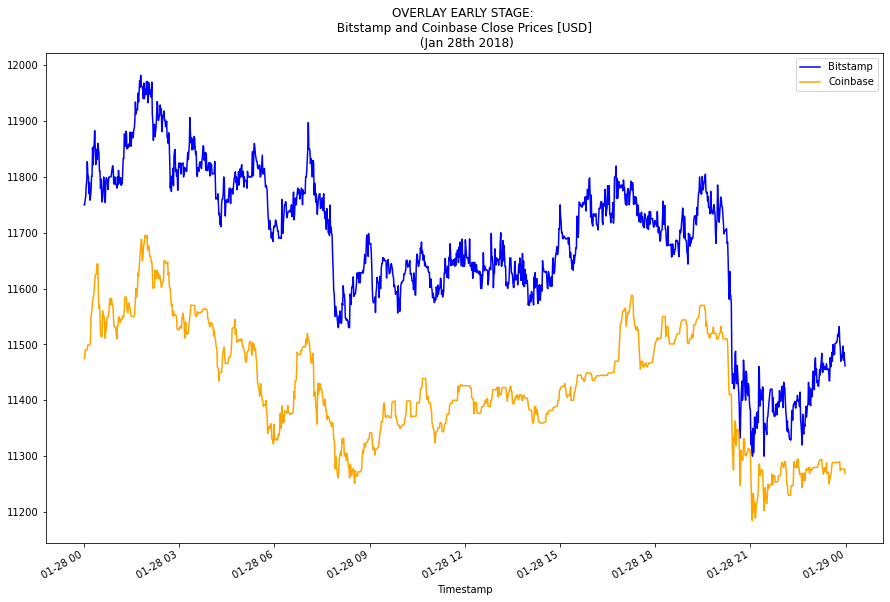

In [365]:
#EARLY STAGE - DAILY SPREAD ANALYSIS
# Sample day: Jan 28th 2018
# Overlay plot that visualizes the two dataframes on Jan 28th 2018
 
bitstamp_sliced.loc['2018-01-28'].plot(legend=True, figsize=(15,10), title=("OVERLAY EARLY STAGE: \n Bitstamp and Coinbase Close Prices [USD] \n (Jan 28th 2018)"), color="blue", label="Bitstamp");
coinbase_sliced.loc['2018-01-28'].plot(legend=True, figsize=(15,10), color="orange", label="Coinbase");

In [380]:
# CALCULATION OF ARBITRAGE SPREAD
# EARLY STAGE
# Sample: Jan 28th 2018
# by subtracting the bitstamp (higher) closing prices from the coinbase (lower) closing prices
early_bitstamp=bitstamp_sliced.loc['2018-01-28']
early_coinbase=coinbase_sliced.loc['2018-01-28']

arbitrage_spread_early = early_bitstamp-early_coinbase

arbitrage_spread_early = arbitrage_spread_early.rename('Arbitrage_Spread_Early_Stage')

# Summary statistics for the early DataFrame
arbitrage_spread_early.describe().to_frame()

,Arbitrage_Spread_Early_Stage
count,1436.000000
mean,247.552326
std,68.343472
min,55.030000
25%,210.022500
50%,251.180000
75%,290.925000
max,439.010000


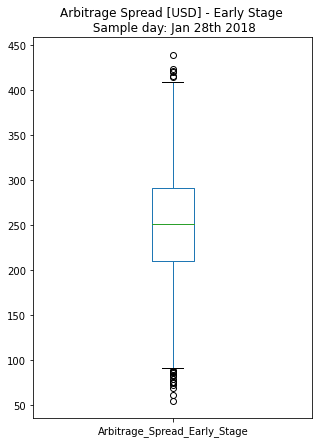

In [362]:
# Box Plot of the arbitrage spread early in the dataset
# Jan 28th 2018
arbitrage_spread_early.plot(kind='box',figsize=(5,7), title="Arbitrage Spread [USD] - Early Stage \n Sample day: Jan 28th 2018");


##### The visualizations confirms that we had a positive spread on Jan 28th 2018.

> 1. The overlay graph shows that Bitstamp exchange was selling above Coinbase all day.

> 2. The central tendency measurements in the summary statistics cuantify this spread as around 250 [USD] in mean and median, and allow us to conclude that this is a significant positive spread, since it is more than 3 standard deviation above zero. Moreover, the minimum value was 55 [USD], which is positive. 

> 3. The box plot reaffirms the significance of this positive spread, making visible that all points of the spread, including outliers, are above zero.

We can conclude that, at early stage, there was an important potential for arbitrage gains by buying at Bitstamp and simultaneously selling at Coinbase, before transaction costs.

#### Middle Stage Spread Analysis

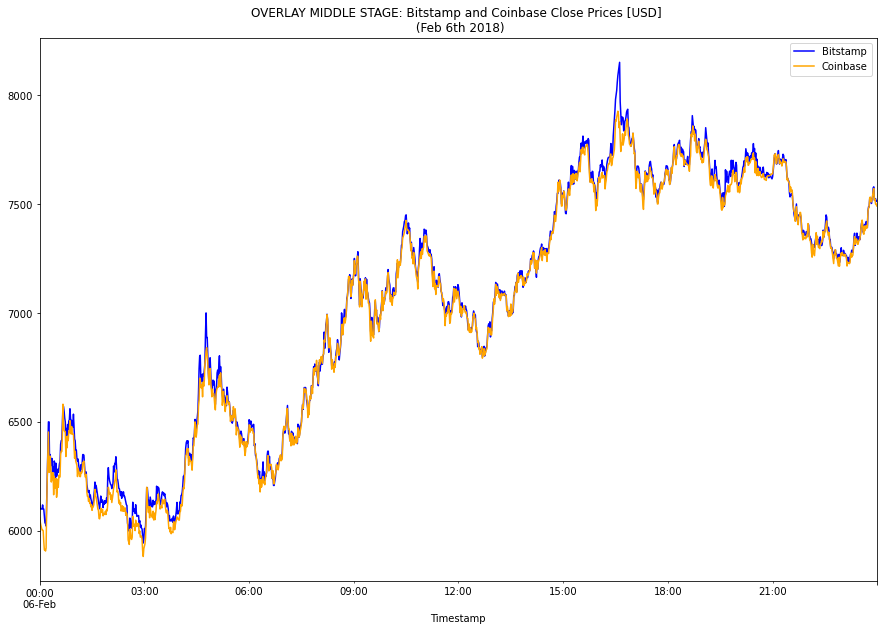

In [366]:
# MIDDLE STAGE DAY SPREAD ANALYSIS
# Sample day: Feb 6tg 2018
# Overlay plot that visualizes the two dataframes on Feb 6th 2018 
bitstamp_sliced.loc['2018-02-06'].plot(legend=True, figsize=(15,10), title=("OVERLAY MIDDLE STAGE: Bitstamp and Coinbase Close Prices [USD] \n (Feb 6th 2018)"), color="blue", label="Bitstamp");
coinbase_sliced.loc['2018-02-06'].plot(legend=True, figsize=(15,10), color="orange", label="Coinbase");

In [381]:
# CALCULATION OF ARBITRAGE SPREAD
# MIDDLE STAGE
# Sample: Feb 6th 2018
# by subtracting the bitstamp (higher) closing prices from the coinbase (lower) closing prices

middle_bitstamp=bitstamp_sliced.loc['2018-02-06']
middle_coinbase=coinbase_sliced.loc['2018-02-06']


arbitrage_spread_middle = middle_bitstamp-middle_coinbase
arbitrage_spread_middle = arbitrage_spread_middle.rename('Arbitrage_Spread_Middle_Stage')

# Summary statistics for the middle stage
arbitrage_spread_middle.describe().to_frame()

,Arbitrage_Spread_Middle_Stage
count,1440.000000
mean,23.841236
std,30.390321
min,-51.000000
25%,4.675000
50%,19.375000
75%,37.877500
max,280.010000


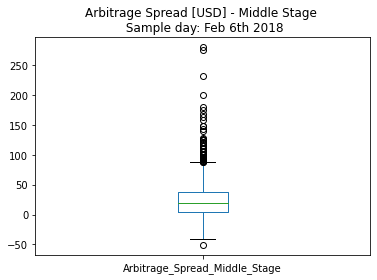

In [364]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box', title= "Arbitrage Spread [USD] - Middle Stage \n Sample day: Feb 6th 2018");


###### The visualizations confirm that there is a decrease in the arbitrage spread on Feb 6th 2018. 

> 1. The overlay graph shows that Bitstamp exchange was selling above Coinbase only at some moment of the day.

> 2. The summary statistics cuantifies the spread as around just 20 [USD] in mean and median, which is significant less than the early stage of 250 [USD]. We can conclude that this small amount is not significantly positive spread, since it is less than one standard deviation (30[USD]) above zero. 

> 3. The box plot makes visible that, even though most of the day do not present opportunities for arbitrage, there are several outliers with high values. This include a maximum of 280[USD], value that you can see on the summary statistics.

We can conclude that, at middle stage, there was a smaller potential for arbitrage gains than at early stage, by buying at Bitstamp and simultaneously selling at Coinbase, before transaction costs. However, it also shows that opportunity may exist if the investor is able to capture "outlier moments" when there are significant differences. 

#### Later Stage Spread Analysis

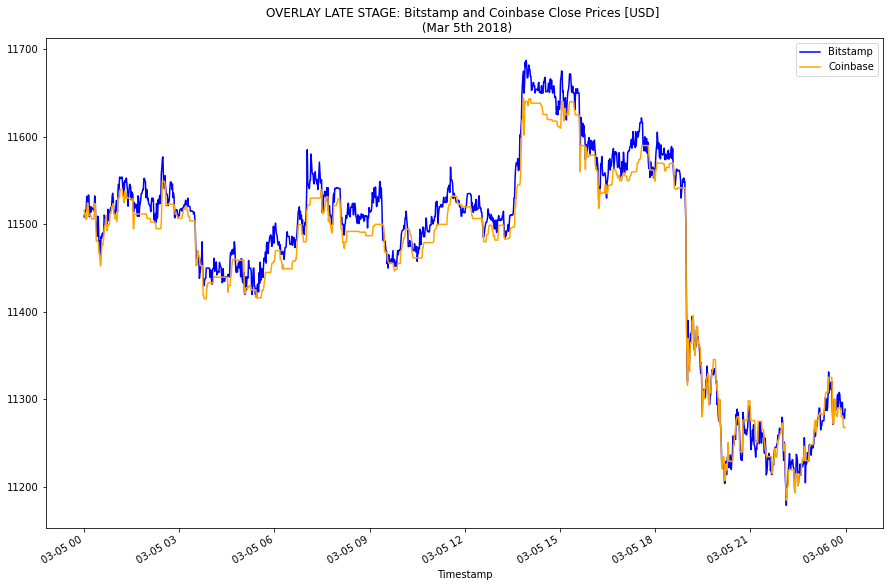

In [376]:
# MIDDLE STAGE DAY SPREAD ANALYSIS
# Sample day: Mar 5th 2018
# Overlay plot that visualizes the two dataframes on Mar 5th 2018 
bitstamp_sliced.loc['2018-03-05'].plot(legend=True, figsize=(15,10), title=("OVERLAY LATE STAGE: Bitstamp and Coinbase Close Prices [USD] \n (Mar 5th 2018)"), color="blue", label="Bitstamp");
coinbase_sliced.loc['2018-03-05'].plot(legend=True, figsize=(15,10), color="orange", label="Coinbase");

In [382]:
# CALCULATION OF ARBITRAGE SPREAD
# LATE STAGE
# Sample: Mar 5th 2018
# by subtracting the bitstamp (higher) closing prices from the coinbase (lower) closing prices
late_bitstamp=bitstamp_sliced.loc['2018-03-5']
late_coinbase=coinbase_sliced.loc['2018-03-5']

arbitrage_spread_late = late_bitstamp-late_coinbase

arbitrage_spread_late = arbitrage_spread_late.rename('Arbitrage_Spread_Late_Stage')

# Summary statistics for the early DataFrame
arbitrage_spread_late.describe().to_frame()

,Arbitrage_Spread_Late_Stage
count,1437.000000
mean,11.817683
std,14.276780
min,-33.180000
25%,2.940000
50%,11.500000
75%,20.470000
max,68.280000


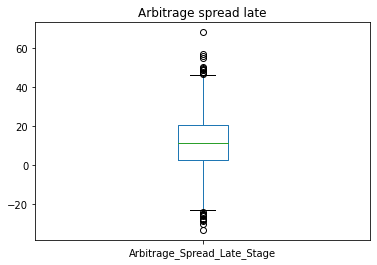

In [375]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box', title= "Arbitrage spread late");

##### The visualizations confirm that there is again a decrease in the arbitrage spread from the middle stage to the late stage, based on data from March 5th 2018.

> 1. The overlay graph shows that Bitstamp exchange was selling above Coinbase for most of the period. 

> 2. The summary statistics cuantifies the spread as around just 11 [USD] in mean and median, which is significant less than the early stage of 250 [USD], and smaller than the middle stage sample day of 20[USD]. We can conclude that this small amount is not significantly positive spread, since it is less than one standard deviation (14[USD]) above zero. 

> 3. The box plot makes visible that, even though most of the day do not present opportunities for arbitrage, there are several outliers with high values. However, the maximum amount of outliers are much smaller than in the middle stage (60 versus 280[USD]). Moreover, in the late stage we find several outliers on the negative side, which make the arbitrage strategy implementation riskier in the sense that some transactions may go on the wrong side of the profit.


##### Overall conclusions before calculations of profitability:
    First of all, to acknoledge that it is difficult to draw conclusions from looking at just 3 days. What is important, though, is that these days have been chosen by looking for arbitrage opportunities, so somehow represent a sample of "good days" for arbitrage in each stage. In that sense, these days are representative.
    
     The analysis of these sample days corroborate that there is a reduction in profit spread average and dispersion from the biggining through the end of the quarter. Also, that outliers were much larger at the beggining that later. This means that in early stage in a good day it was common to have spikes, and those spikes were large, and bias toward buying in Bitsshop than Coinstamp, so more opportunities for arbitrage were present. However, in later stages, spikes are more rare, smaller in size, and sometimes positive, other negative, and so, arbitrage opportunities are less important and harder to implement. 
     
     In summary, the data shows that the market got more efficient as time advanced in the first quarter of 2018.

### Step 4: Calculation of the Arbitrage Profits

In this section we calculate the potential profits for each sample day date selected in the previous section. The goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. The following steps are completed:

1. For each of the three dates, we filter just the times where the arbitrage spread is greater than zero by using a conditional statement, and generate the summary statistics.

2. For each of the three dates we calculate the spread returns. To do so, we divide the instances that have a positive arbitrage spread by the price of Bitcoin from the exchange we’re buying on (Coinbase), and review the resulting dataset.

3. For each of the three dates, we include transactions cost for 1%, and narrow down the trading opportunities accordingly. That is to say, we select the trades with positive returns above 1%.

4. We generate the summary statistics of the spread returns that are greater than 1%. 

5. For each of the three dates, we calculate the potential profit, in dollars, per trade. To do so, we multiply the spread returns that were greater than 1% by the cost of what was purchased. We drop any missing values from the resulting DataFrame.

6. We generate the summary statistics, and plot the results for each of the three DataFrames.

7. We calculate the potential arbitrage profits that we can make on each day. To do so, we sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, we plot the cumulative sum of each of the three DataFrames. 
### Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, we filter just the times where the arbitrage spread is greater than zero by using a conditional statement, and generate the summary statistics.


In [386]:
# CALCULATION OF POSITIVE ARBITRAGE SPREAD 
# EARLY STAGE
# Sample: Jan 28th 2018
# by filtering only positive values of the arbitrage spread

arbitrage_positive_spread_early=arbitrage_spread_early[arbitrage_spread_early>0]
arbitrage_positive_spread_middle=arbitrage_spread_middle[arbitrage_spread_middle>0]
arbitrage_positive_spread_late=arbitrage_spread_late[arbitrage_spread_late>0]

summary=pd.concat([arbitrage_positive_spread_early.describe(),arbitrage_positive_spread_middle.describe(), arbitrage_positive_spread_late.describe()],axis=1)
                
summary                
                

,Arbitrage_Spread_Early_Stage,Arbitrage_Spread_Middle_Stage,Arbitrage_Spread_Late_Stage
count,1436.000000,1177.000000,1155.000000
mean,247.552326,31.294452,16.740208
std,68.343472,28.481383,10.860019
min,55.030000,0.010000,0.020000
25%,210.022500,13.000000,8.880000
50%,251.180000,24.530000,14.790000
75%,290.925000,42.540000,23.195000
max,439.010000,280.010000,68.280000


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [393]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_positive_spread_early / early_coinbase
spread_return_middle= arbitrage_positive_spread_middle/middle_coinbase
spread_return_late= arbitrage_positive_spread_late/late_coinbase

# Review the spread return Series for different stages here an below
spread_return_early


Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
                         ...   
2018-01-28 23:55:00    0.019518
2018-01-28 23:56:00    0.017302
2018-01-28 23:57:00    0.018510
2018-01-28 23:58:00    0.017303
2018-01-28 23:59:00    0.017094
Length: 1440, dtype: float64

In [392]:
# Review the spread return Series
spread_return_middle

Timestamp
2018-02-06 00:00:00    0.010084
2018-02-06 00:01:00    0.009950
2018-02-06 00:02:00    0.012606
2018-02-06 00:03:00    0.014129
2018-02-06 00:04:00    0.016004
                         ...   
2018-02-06 23:55:00         NaN
2018-02-06 23:56:00         NaN
2018-02-06 23:57:00    0.003271
2018-02-06 23:58:00    0.001536
2018-02-06 23:59:00    0.003157
Length: 1440, dtype: float64

In [397]:
# Review the spread return Series
spread_return_late

Timestamp
2018-03-05 00:00:00         NaN
2018-03-05 00:01:00    0.000031
2018-03-05 00:02:00    0.000412
2018-03-05 00:03:00    0.000803
2018-03-05 00:04:00    0.001053
                         ...   
2018-03-05 23:55:00    0.000203
2018-03-05 23:56:00    0.001392
2018-03-05 23:57:00    0.000929
2018-03-05 23:58:00    0.000966
2018-03-05 23:59:00    0.001853
Length: 1440, dtype: float64

#### 3. For each of the three dates, we include transactions cost for 1%, and narrow down the trading opportunities accordingly. That is to say, we select the trades with positive returns above 1%.

In [406]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>0.01]
profitable_trades_middle = spread_return_middle[spread_return_middle>0.01]
profitable_trades_late = spread_return_late[spread_return_late>0.01]

# Counting of profitable trades above 1% in early stage
profitable_trades_early.count()

1378

In [407]:
# Review the first five profitable trades in middle stage
profitable_trades_middle.count()

110

In [408]:
# Review the first five profitable trades in later stage
profitable_trades_late.head()  #None!

Series([], dtype: float64)

In [411]:
# Look on the five first rows of the profitable trades
# Early Stage
profitable_trades_early.head()

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
dtype: float64

In [412]:
# Look on the five first rows of the profitable trades
# Middle Stage
profitable_trades_middle.head()

Timestamp
2018-02-06 00:00:00    0.010084
2018-02-06 00:02:00    0.012606
2018-02-06 00:03:00    0.014129
2018-02-06 00:04:00    0.016004
2018-02-06 00:05:00    0.019154
dtype: float64

In [413]:
# Look on the five first rows of the profitable trades
# Late Stage
profitable_trades_late.head()

Series([], dtype: float64)

#### 4. Summary statistics of spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [419]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_comparison=pd.concat([profitable_trades_early.describe(), 
                                               profitable_trades_middle.describe(),
                                               profitable_trades_late.describe()], axis=1, join="inner",
                                               keys=["Early_Stage", "Middle_Stage", "Late_Stage"])
profitable_trades_comparison           

,Early_Stage,Middle_Stage,Late_Stage
count,1378.000000,110.000000,0.0
mean,0.022201,0.014312,NaN
std,0.005421,0.005292,NaN
min,0.010087,0.010084,NaN
25%,0.019016,0.010822,NaN
50%,0.022191,0.012209,NaN
75%,0.025413,0.015809,NaN
max,0.038510,0.036984,NaN


##### The table above compares statistics relative to the profitable trades (above 1%) in the three stages. We can see that the potential in the early stage is around 2.2%, almost double the potential in the middle stage (1.4%), with a similar standard deviation (5%). The late stage dis not have any profitable trade.

#### 5. For each of the three dates, we calculate the potential profit per trade, in dollars. To do so, we multiply the spread returns that were greater than 1% by the cost of what was purchased. We drop any missing values from the resulting DataFrame.

In [443]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_per_trade_early = profitable_trades_early * early_coinbase
profit_per_trade_middle = profitable_trades_middle * middle_coinbase
profit_per_trade_late = profitable_trades_late * late_coinbase

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_per_trade_early.dropna()
profit_per_trade_middle = profit_per_trade_middle.dropna()
profit_per_trade_late = profit_per_trade_late.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
dtype: float64

In [444]:
# View the early profit Series in middle stage
profit_per_trade_middle.head()

Timestamp
2018-02-06 00:00:00     61.12
2018-02-06 00:02:00     75.95
2018-02-06 00:03:00     84.99
2018-02-06 00:04:00     96.09
2018-02-06 00:05:00    115.00
dtype: float64

In [445]:
# View the  profit series in late stage
profit_per_trade_late.head()  #none

Series([], dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [446]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_summary=pd.concat([profit_per_trade_early.describe(),profit_per_trade_middle.describe(),
                          profit_per_trade_late.describe()],axis=1, keys=["Early_Stage", "Middle_Stage", "Late_Stage"])

profit_per_trade_summary
                         

,Early_Stage,Middle_Stage,Late_Stage
count,1378.000000,110.000000,0.0
mean,253.931996,94.872545,NaN
std,62.057953,41.169942,NaN
min,113.970000,61.120000,NaN
25%,217.272500,68.205000,NaN
50%,254.150000,80.010000,NaN
75%,292.987500,106.697500,NaN
max,439.010000,280.010000,NaN


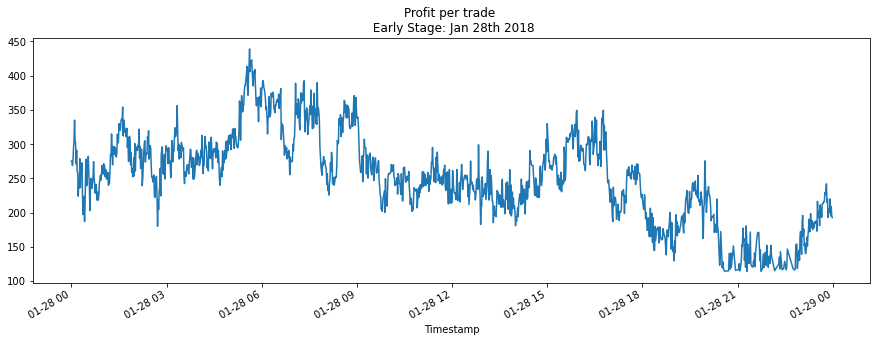

In [462]:
# Early stage profit per trade - Jan 28th 2018
profit_per_trade_early.plot(figsize=(15,5), title= "Profit per trade \n Early Stage: Jan 28th 2018");

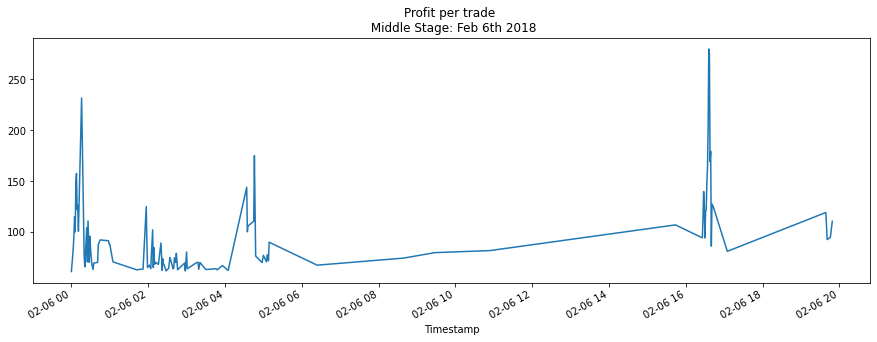

In [461]:
# Middle stage profit per trade - Feb 6 2018
profit_per_trade_middle.plot(figsize=(15,5), title= "Profit per trade \n Middle Stage: Feb 6th 2018");

#### 7. Calculation of the potential arbitrage profits on a good day in each stage, by the aggregation of the profit_per_trade in the sample day. 
Obs: Late stage is omitted, since it doesn't have any profit during the sample day.

In [475]:
# Sum of the potential profits per stage
profit_sum_early=profit_per_trade_early.sum()
profit_sum_middle=profit_per_trade_middle.sum()
profit_sum_late=profit_per_trade_late.sum()

print("Profit at Early Stage good day : $",round(profit_sum_early,2))
print("Profit at Middle Stage good day: $",round(profit_sum_middle,2))
print("Profit at Late Stage good day  : $",round(profit_sum_late,2))

Profit at Early Stage good day : $ 349918.29
Profit at Middle Stage good day: $ 10435.98
Profit at Late Stage good day  : $ 0.0


#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

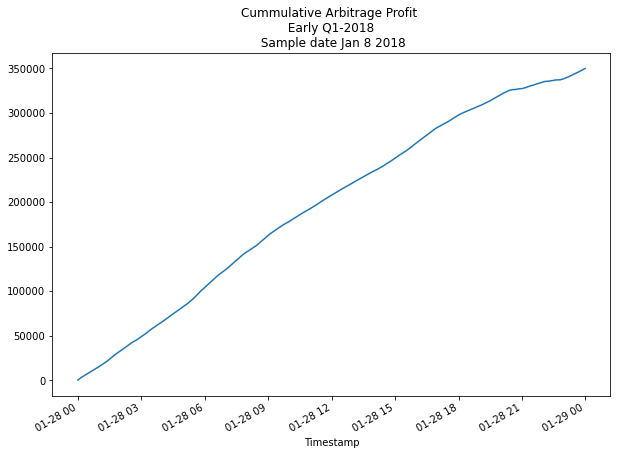

In [482]:
# Calculate of the cumulative profits over time for the early profit, applying the cumsum function
cumulative_profit_early = profit_per_trade_early.cumsum()
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10,7), title="Cummulative Arbitrage Profit \n Early Q1-2018 \n Sample date Jan 8 2018");


<AxesSubplot:title={'center':'Cummulative Arbitrage Profit \n Middle Q1-2018 \n Sample date Feb 6th 2018'}, xlabel='Timestamp'>

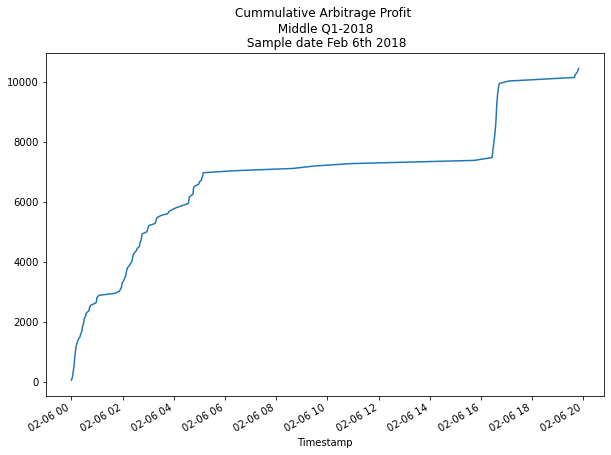

In [481]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(10,7), title="Cummulative Arbitrage Profit \n Middle Q1-2018 \n Sample date Feb 6th 2018")

**Question:** After reviewing the profit information across each date from the different time periods, can we identify any patterns or trends? 
    
**Answer:** 
Yes. Cummulative profits on one good day applying an arbitrage strategy reached around 350,000 [USD] above transaction cost. A good day in the middle stage provided cummulative profits of around 10,000[USD], which still may be atractive. The later period did not provide profits above transaction costs. These results consider a size of one bitcoin in each transactions, and the aggregation of all profitable transactions of more than 1% return.

The cummulative graphs shows that the profit in the sample early stage increases constantly, meaning that opportunities were available all day around, as the plots for profitable trades showed as well. However, in the middle stage, we observe jumps and long periods of plateaus in the cummulative returns, meaning that opportunities are not there all day. That can be seen also in the profitable trades, which are more separate in time during the day. 

### FINAL CONCLUSION

Q1-2018 offered big opportunities for arbitrage profits. A good day during the BitCoin crush of Q1-2018 generated a gain of almost 350,000 [USD] above transaction cost. This profit, for the cummulative trading of one bitcoin in one day of the early part of the period, which is the one that appear as more profitable. 

The analysis shows that the opportunity for arbitrage fell considerably after about one month of the crush, due to probably two reasons. One, because of the advantage taken by arbitrage traders that increase demand and supply, which  tend to descrease the spread. Second, because of the stabilization of the market price, which implies a reduction in the volatility after a bottom and more stable price is achieve due to market conditions, separate from the arbitrage traders effect. 
 
In conclusion, it appear that during crushes there is a very good opportunity to profit from arbitrage strategies. At the same time, to participate and profit of them, it is imperative to act fast. So, it is required to have a prepared team and top notch technology, in order to enter immediately as soon as a crush, or other opportunity arises.